In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline

In [2]:
pd.options.display.max_columns = None

attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition_no = attrition[attrition['Attrition'] == 'No'].iloc[:550]
attrition_no

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,Y,No,13,3,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8


In [4]:
attrition_yes = attrition[attrition['Attrition'] == 'Yes']
attrition_yes

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,4,Male,56,3,2,Sales Representative,4,Married,2086,3335,3,Y,No,14,3,3,80,1,19,6,4,1,0,0,0
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,2,Male,61,3,1,Research Scientist,4,Married,2293,3020,2,Y,Yes,16,3,1,80,1,6,2,2,2,0,2,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Y,Yes,14,3,3,80,0,3,2,3,3,2,0,2
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1


In [5]:
attrition = pd.concat([attrition_yes, attrition_no])
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
33,39,Yes,Travel_Rarely,895,Sales,5,3,Technical Degree,1,42,4,Male,56,3,2,Sales Representative,4,Married,2086,3335,3,Y,No,14,3,3,80,1,19,6,4,1,0,0,0
34,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,45,2,Male,61,3,1,Research Scientist,4,Married,2293,3020,2,Y,Yes,16,3,1,80,1,6,2,2,2,0,2,0
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,1,Male,86,2,1,Sales Representative,3,Married,2683,3810,1,Y,Yes,14,3,3,80,0,3,2,3,3,2,0,2
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1


In [17]:
# Check data quality
attrition.isnull().any()

False

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


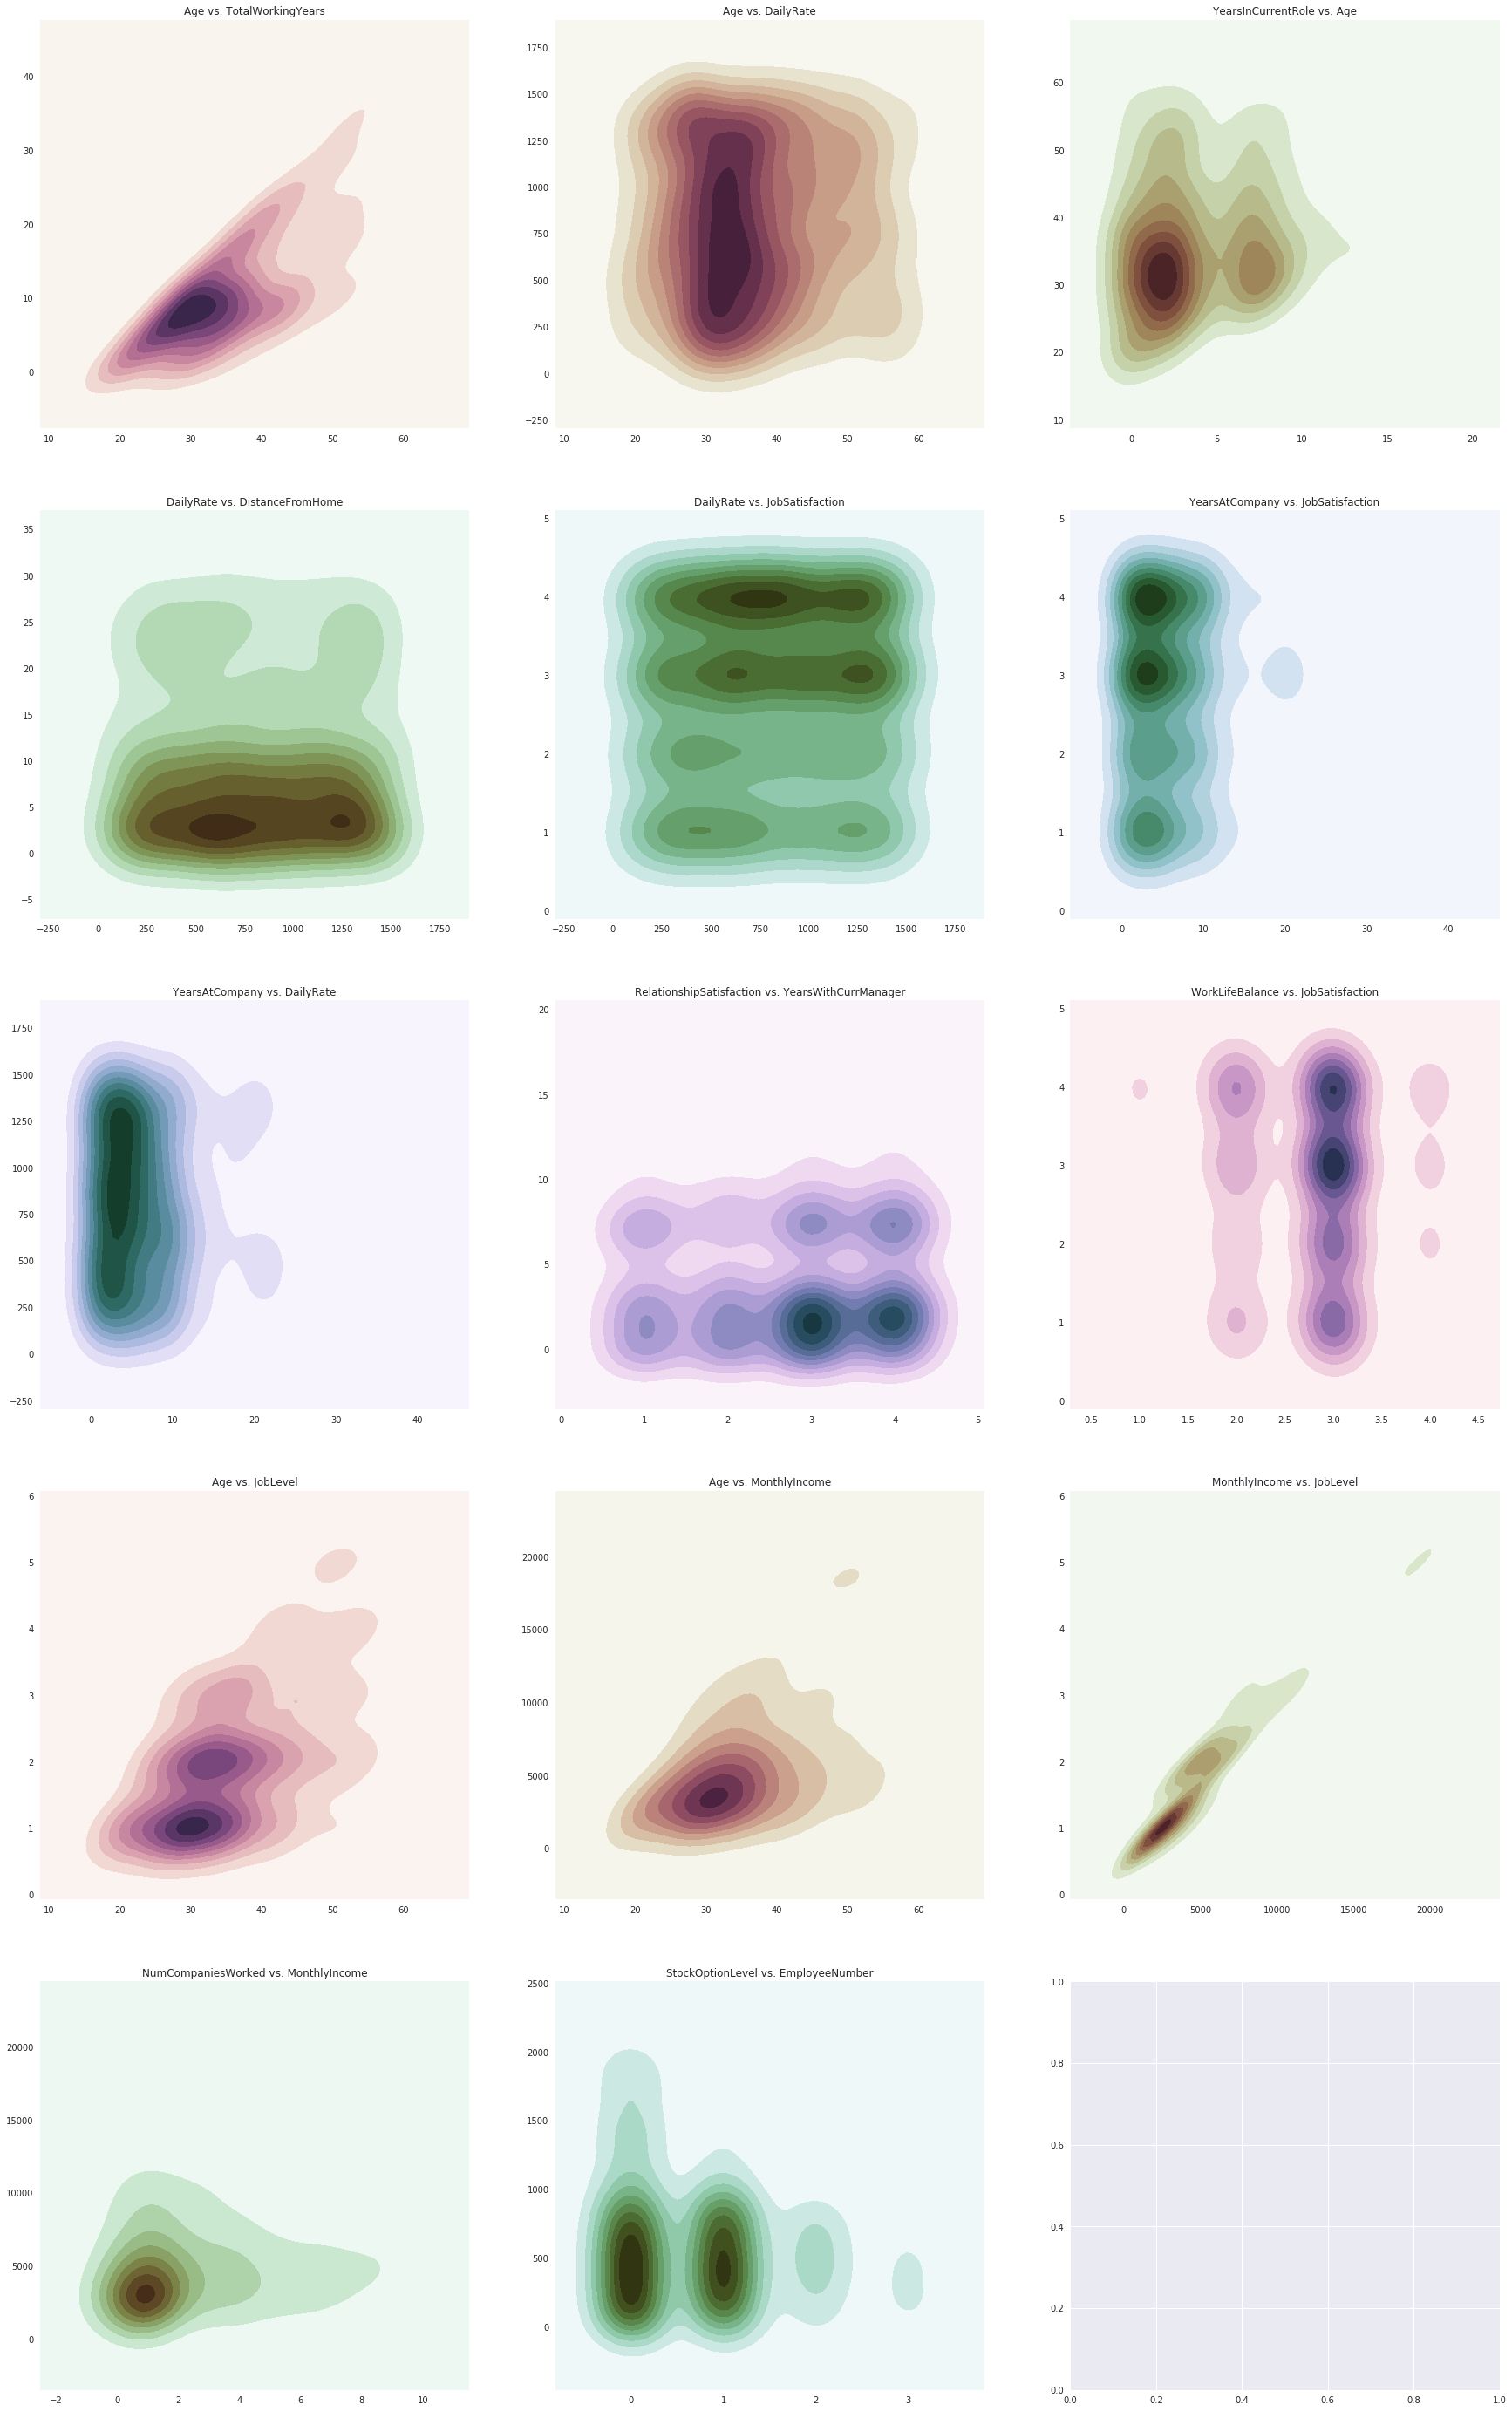

In [7]:
# Creating subplots
f, axes = plt.subplots(5, 3, figsize=(30,50), sharex=False, sharey=False)

# Set color palette
color_start = 0.0
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label):
    global color_start, cmap, axes, axes_x, axes_y
    x = attrition[x_label].values
    y = attrition[y_label].values
    sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title='{} vs. {}'.format(x_label, y_label))
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1
    color_start = color_start + 0.33
    cmap = sns.cubehelix_palette(start=color_start, light=1, as_cmap=True)


plot_xy('Age', 'TotalWorkingYears')
plot_xy('Age', 'DailyRate')
plot_xy('YearsInCurrentRole', 'Age')
plot_xy('DailyRate', 'DistanceFromHome')
plot_xy('DailyRate', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'JobSatisfaction')
plot_xy('YearsAtCompany', 'DailyRate')
plot_xy('RelationshipSatisfaction', 'YearsWithCurrManager')
plot_xy('WorkLifeBalance', 'JobSatisfaction')
plot_xy('Age', 'JobLevel')
plot_xy('Age', 'MonthlyIncome')
plot_xy('MonthlyIncome', 'JobLevel')
plot_xy('NumCompaniesWorked', 'MonthlyIncome')
plot_xy('StockOptionLevel', 'EmployeeNumber')

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


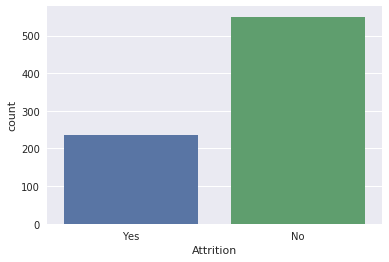

In [8]:
# Convert attrition to numericals
target_map = {'Yes':1, 'No':0}
attrition[u'Attrition_num'] = attrition[u'Attrition'].apply(lambda x: target_map[x])

sns.countplot(x='Attrition', data=attrition)


/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


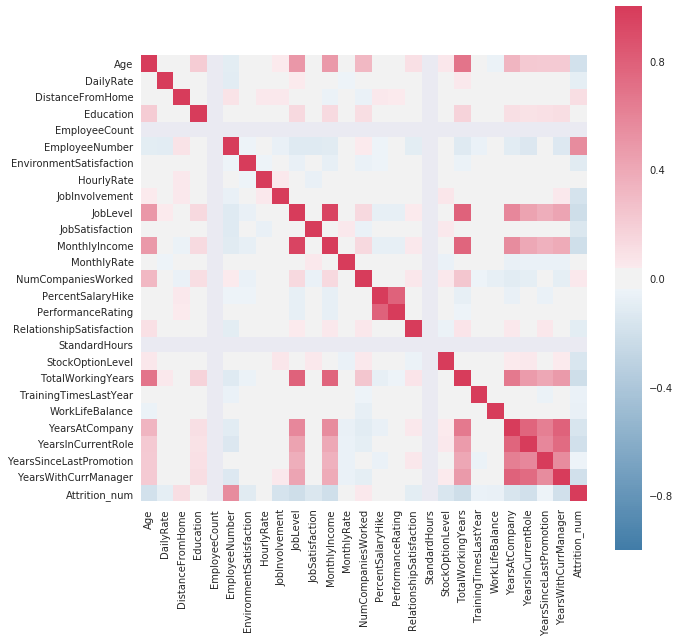

In [9]:


# Remove non-numerical columns
attrition_numerical_cols = attrition._get_numeric_data()
corr = attrition_numerical_cols.corr()

# Graph heatmap to visualize correlations between data
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(240, 5, as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, ax=ax)

/home/t-yowu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


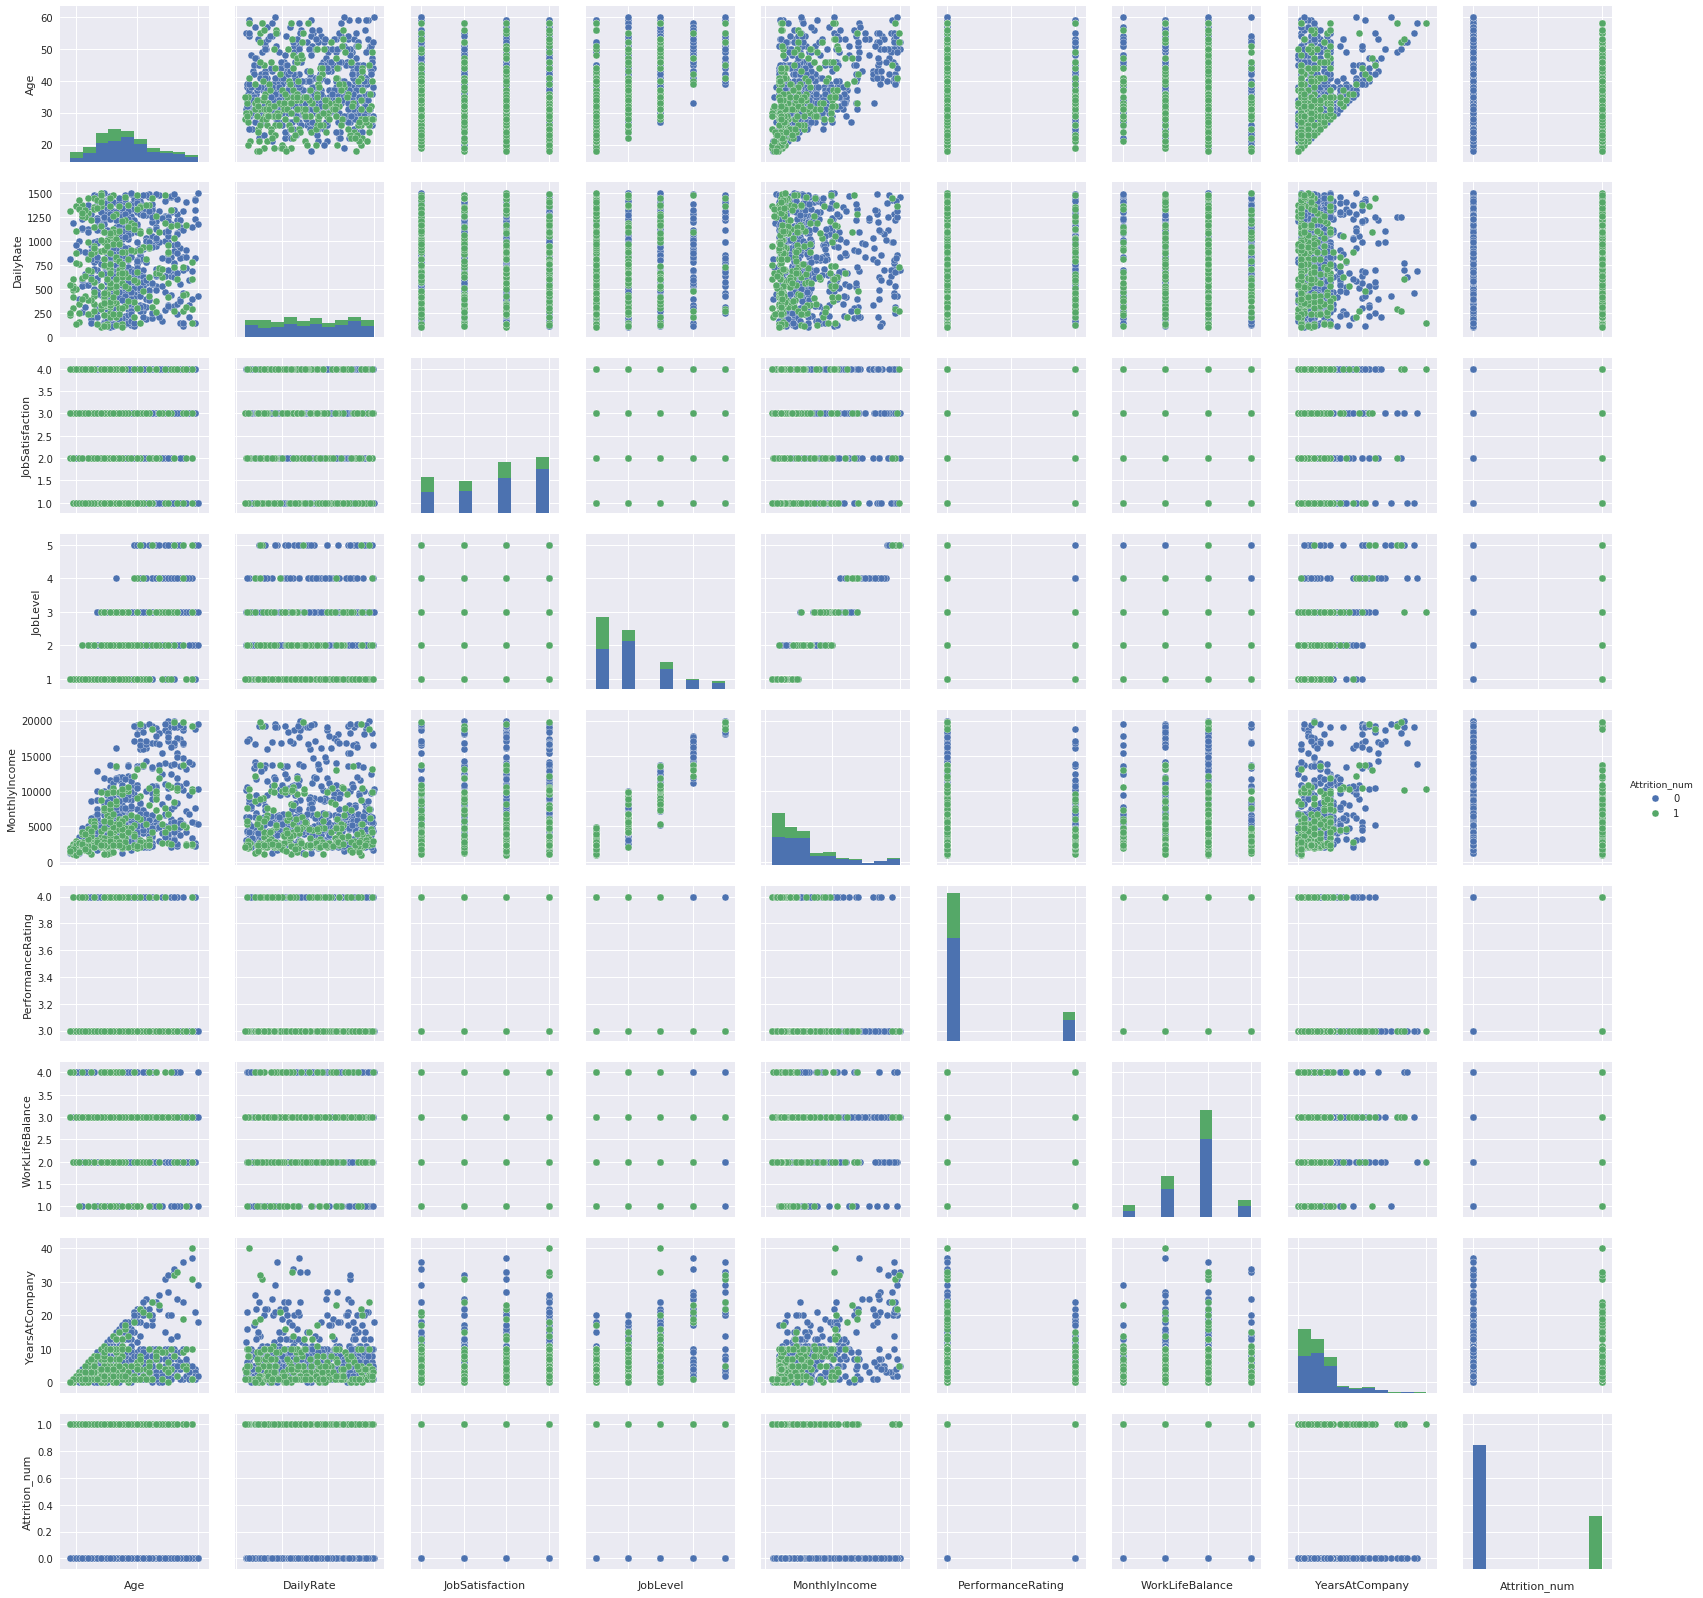

In [10]:
numerical = ['Age', 'DailyRate', 'JobSatisfaction', 'JobLevel', 'MonthlyIncome', 'PerformanceRating', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition_num']

# Plot pairplot to visualize correlations
g = sns.pairplot(attrition[numerical], hue='Attrition_num')
g.set(xticklabels=[])

In [11]:
categorical = attrition.select_dtypes(include=['object'])
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
14,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,Yes
21,Yes,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Single,Y,No
24,Yes,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Single,Y,No
26,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y,Yes
33,Yes,Travel_Rarely,Sales,Technical Degree,Male,Sales Representative,Married,Y,No
34,Yes,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y,Yes
36,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Married,Y,Yes
42,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No


In [12]:
numerical = attrition_numerical_cols.drop(u'Attrition_num', 1)
numerical

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
14,28,103,24,3,1,19,3,50,2,1,3,2028,12947,5,14,3,2,80,0,6,4,3,4,2,0,3
21,36,1218,9,4,1,27,3,82,2,1,1,3407,6986,7,23,4,2,80,0,10,4,3,5,3,0,3
24,34,699,6,1,1,31,2,83,3,1,1,2960,17102,2,11,3,3,80,0,8,2,3,4,2,1,3
26,32,1125,16,1,1,33,2,72,1,1,1,3919,4681,1,22,4,2,80,0,10,5,3,10,2,6,7
33,39,895,5,3,1,42,4,56,3,2,4,2086,3335,3,14,3,3,80,1,19,6,4,1,0,0,0
34,24,813,1,3,1,45,2,61,3,1,4,2293,3020,2,16,3,1,80,1,6,2,2,2,0,2,0
36,50,869,3,2,1,47,1,86,2,1,3,2683,3810,1,14,3,3,80,0,3,2,3,3,2,0,2
42,26,1357,25,3,1,55,1,48,1,1,3,2293,10558,1,12,3,3,80,0,1,2,2,1,0,0,1


In [13]:
categorical = pd.get_dummies(categorical)
categorical

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
2,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
14,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
21,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
24,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0
26,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
33,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
34,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
36,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
42,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [14]:
pd.options.display.max_columns = None
input_data = pd.concat([numerical, categorical], axis=1)
input_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
14,28,103,24,3,1,19,3,50,2,1,3,2028,12947,5,14,3,2,80,0,6,4,3,4,2,0,3,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
21,36,1218,9,4,1,27,3,82,2,1,1,3407,6986,7,23,4,2,80,0,10,4,3,5,3,0,3,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
24,34,699,6,1,1,31,2,83,3,1,1,2960,17102,2,11,3,3,80,0,8,2,3,4,2,1,3,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0
26,32,1125,16,1,1,33,2,72,1,1,1,3919,4681,1,22,4,2,80,0,10,5,3,10,2,6,7,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1
33,39,895,5,3,1,42,4,56,3,2,4,2086,3335,3,14,3,3,80,1,19,6,4,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0
34,24,813,1,3,1,45,2,61,3,1,4,2293,3020,2,16,3,1,80,1,6,2,2,2,0,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
36,50,869,3,2,1,47,1,86,2,1,3,2683,3810,1,14,3,3,80,0,3,2,3,3,2,0,2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
42,26,1357,25,3,1,55,1,48,1,1,3,2293,10558,1,12,3,3,80,0,1,2,2,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [20]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
np_scaled = min_max_scaler.fit_transform(input_data)
input_data_normalized = pd.DataFrame(np_scaled, columns=input_data.columns.values)
input_data_normalized

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.547619,0.715616,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.452381,0.909742,0.035714,0.25,0.0,0.001461,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.238095,0.000000,0.821429,0.50,0.0,0.008763,0.666667,0.285714,0.333333,0.00,0.666667,0.053660,0.435776,0.555556,0.214286,0.0,0.333333,0.0,0.000000,0.150,0.666667,0.666667,0.100,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.428571,0.798711,0.285714,0.75,0.0,0.012658,0.666667,0.742857,0.333333,0.00,0.000000,0.126277,0.196426,0.777778,0.857143,1.0,0.333333,0.0,0.000000,0.250,0.666667,0.666667,0.125,0.166667,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.380952,0.426934,0.178571,0.00,0.0,0.014606,0.333333,0.757143,0.666667,0.00,0.000000,0.102738,0.602610,0.222222,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.333333,0.666667,0.100,0.111111,0.066667,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.333333,0.732092,0.535714,0.00,0.0,0.015579,0.333333,0.600000,0.000000,0.00,0.000000,0.153239,0.103875,0.111111,0.785714,1.0,0.333333,0.0,0.000000,0.250,0.833333,0.666667,0.250,0.111111,0.400000,0.411765,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.500000,0.567335,0.142857,0.50,0.0,0.019961,1.000000,0.371429,0.666667,0.25,1.000000,0.056714,0.049829,0.333333,0.214286,0.0,0.666667,0.0,0.333333,0.475,1.000000,1.000000,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.142857,0.508596,0.000000,0.50,0.0,0.021422,0.333333,0.442857,0.666667,0.00,1.000000,0.067615,0.037181,0.222222,0.357143,0.0,0.000000,0.0,0.333333,0.150,0.333333,0.333333,0.050,0.000000,0.133333,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.761905,0.548711,0.071429,0.25,0.0,0.022395,0.000000,0.800000,0.333333,0.00,0.666667,0.088152,0.068902,0.111111,0.214286,0.0,0.666667,0.0,0.000000,0.075,0.333333,0.666667,0.075,0.111111,0.000000,0.117647,0.0,1.

In [21]:
input_data_normalized[['Attrition_No', 'Attrition_Yes']]

,Attrition_No,Attrition_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0
